In [25]:
import numpy as np
import pandas as pd
from cmath import nan
from datetime import datetime
from operator import contains
from time import strptime
import re

In [26]:

# method to convert datetime object to timestamp
def convert_to_timestamp(dt_str):
    timestamp =  dt_str.timestamp()
    return timestamp

def add_valid_rating_using_text(text):
    pattern = re.compile(r'([2][0-5]|[0-1][0-9])\/10')
    
    if pattern.search(text):
        try:
            val = float(pattern.search(text).group(1))
            return val
        except:
            return -10
    return -10

data= pd.read_csv('dog_rates_tweets.csv', sep=',',
        parse_dates=['created_at'])
data['timestamp'] = data.created_at.apply(convert_to_timestamp)
data['rating'] = data.text.apply(add_valid_rating_using_text)
data = data[data.rating != -10]


In [27]:
from scipy import stats
fit = stats.linregress(data['timestamp'], data['rating'])

In [33]:
data

,id,created_at,text,timestamp,rating,prediction,residuals
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,1.525935e+09,14.0,12.470224,1.529776
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,1.525822e+09,13.0,12.468849,0.531151
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,1.525760e+09,14.0,12.468096,1.531904
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,1.525419e+09,13.0,12.463948,0.536052
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,1.525310e+09,13.0,12.462630,0.537370
...,...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,1.592936e+09,14.0,13.284903,0.715097
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,1.592843e+09,13.0,13.283768,-0.283768
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,1.592776e+09,13.0,13.282956,-0.282956
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,1.592526e+09,12.0,13.279919,-1.279919


In [34]:
data['prediction'] = fit.slope*data['timestamp']+fit.intercept
data

,id,created_at,text,timestamp,rating,prediction,residuals
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,1.525935e+09,14.0,12.470224,1.529776
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,1.525822e+09,13.0,12.468849,0.531151
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,1.525760e+09,14.0,12.468096,1.531904
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,1.525419e+09,13.0,12.463948,0.536052
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,1.525310e+09,13.0,12.462630,0.537370
...,...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,1.592936e+09,14.0,13.284903,0.715097
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,1.592843e+09,13.0,13.283768,-0.283768
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,1.592776e+09,13.0,13.282956,-0.282956
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,1.592526e+09,12.0,13.279919,-1.279919


In [30]:
fit.slope, fit.intercept

(1.215913149566999e-08, -6.083819074605493)

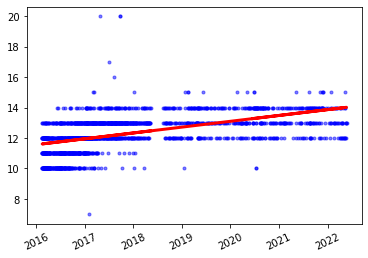

In [31]:
import matplotlib.pyplot as plt

plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()

9.343576920504965e-146


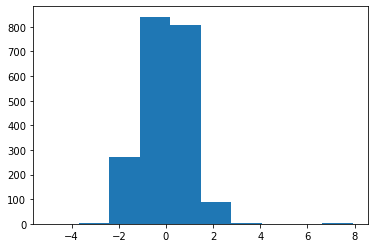

In [32]:
p_value = fit.pvalue
print(p_value)
data['residuals'] = data['rating'] - data['prediction']
plt.hist(data['residuals'])
plt.show()